# About the project
The project aims to demonstrate the ability of using python and data science tools such as pandas or sklearn. I will examine data extracted from twitter using tweepy.

As  data source I chose twitter account of President of South Africa Cyril Ramaphosa and twitter account of opposition leader John Steenhuisen. Main reason for this choice was that the language in South Africa is english, this allows the use of multiple tools, 
which are relatively easy and common. What's more, the low popularity of South Africa's politics makes the data more interesting for analysis.


In [213]:
#imports
import tweepy
import pandas as pd
import nltk
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [146]:
#tweepy authorization
consumer_key="VEb1tyAJ5MnH6rdnZEdsniGvH"
consumer_secret="njeI1Tge3M4J7XSsesG9hJA3U45dnmA9ssy8VjRzgtE2PVDlD5"
access_token="1368276445584367623-yQoo72uQQ2qF2W6tY5wz02EVXUv0R3"
access_token_secret="L2qW8oWTnUgUp6rIMcG4cBJjbWklh1Gx54nOrCuSuCsAb"

In [147]:
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth)

In [234]:
tweets_b =[]

In [152]:
tweets =[]
likes=[]
time=[]
retweeted=[]
tweets_j =[]
likes_j=[]
time_j=[]
retweeted_j=[]
def mine_tweets(twitter_id,count):
    if (twitter_id =='jsteenhuisen'):
        for i in tweepy.Cursor(api.user_timeline,id=twitter_id,tweet_mode="extended").items(count):
                tweets_j.append(i.full_text)
                likes_j.append(i.favorite_count)
                time_j.append(i.created_at)
                retweeted_j.append(i.retweeted)
    if (twitter_id =='CyrilRamaphosa'):
        for i in tweepy.Cursor(api.user_timeline,id=twitter_id,tweet_mode="extended").items(count):
                tweets.append(i.full_text)
                likes.append(i.favorite_count)
                time.append(i.created_at)
                retweeted.append(i.retweeted)
    if (twitter_id =='Buster_ESPN'):       
        for i in tweepy.Cursor(api.user_timeline,id=twitter_id,tweet_mode="extended").items(count):
                tweets_b.append(i.full_text)

In [153]:
#scraping and clearing from replies/retweets
mine_tweets('CyrilRamaphosa',2700)
df = pd.DataFrame({'tweets':tweets,'likes':likes,"time":time,'retweeted':retweeted})

df = df[~df.tweets.str.contains("@")]
df = df[~df.tweets.str.contains("RT")]
df = df.reset_index(drop=True)
print(len(df))

2495


In [154]:
mine_tweets('jsteenhuisen',14000)
df_j = pd.DataFrame({'tweets_j':tweets_j,'likes_j':likes_j,"time_j":time_j,'retweeted_j':retweeted_j})

df_j = df_j[~df_j.tweets_j.str.contains("@")]
df_j = df_j[~df_j.tweets_j.str.contains("RT")]
df_j = df_j.reset_index(drop=True)
print(len(df_j))

614


In [181]:
#filtering Ramaphosa's tweets from tweets which got less than 70 likes
df=df[df['likes']>70]
print(str(round(100 - (2495/2700*100),2))+"% is percantage of Ramaphosa's replies and retwets")
print(str(round(100 - (614/14000*100),2))+"% is percantage of Steenhuisen's replies and retwets")


7.59% is percantage of Ramaphosa's replies and retwets
95.61% is percantage of Steenhuisen's replies and retwets


Despite the fact that I downloaded almost 7 times more tweets of John Steenhuisen than Ramaphosa's after cleaning tweets from replies and retwets I got 4 times more tweets of Ramaphosa.

This is due to a difference in the way of twitter using, the President mainly publishes his tweets without sharing or commenting on others. I could have a lot more Ramaphosa's tweets in  dataset and the tweets would be from the same period of time but I decided to reduce his tweets by appling a filter on likes.

In [299]:
df_j.describe()


,likes_j,polarity_j
count,614.000000,614.000000
mean,406.504886,0.111890
std,668.660180,0.549226
min,5.000000,-0.958300
25%,123.000000,-0.340000
50%,250.500000,0.039750
75%,485.250000,0.583275
max,12880.000000,0.967800


In [298]:
df.describe()

,likes,polarity
count,880.000000,880.000000
mean,669.964773,0.248834
std,2015.431466,0.501450
min,71.000000,-0.972900
25%,101.000000,0.000000
50%,160.000000,0.318200
75%,373.500000,0.685300
max,26445.000000,0.983900


In [189]:
#finding the most liked tweet
print('Most liked tweets of Cyril Ramaphosa:\n')
mostlike = df.loc[df.likes.nlargest(9).index]
print(mostlike['tweets'].iloc[0],'\n number of likes: ',mostlike['likes'].iloc[0])
print('-'*100)
print(mostlike['tweets'].iloc[1],'\n number of likes: ',mostlike['likes'].iloc[1])
print('-'*100)
print(mostlike['tweets'].iloc[2],'\n number of likes: ',mostlike['likes'].iloc[2])
print('-'*100)
print(mostlike['tweets'].iloc[3],'\n number of likes: ',mostlike['likes'].iloc[3])
print('-'*100)
print(mostlike['tweets'].iloc[4],'\n number of likes: ',mostlike['likes'].iloc[4])
print('-'*100)
print(mostlike['tweets'].iloc[5],'\n number of likes: ',mostlike['likes'].iloc[5])
print('-'*100)
print(mostlike['tweets'].iloc[6],'\n number of likes: ',mostlike['likes'].iloc[6])
print('-'*100)
print(mostlike['tweets'].iloc[7],'\n number of likes: ',mostlike['likes'].iloc[7])
print('-'*100)
print(mostlike['tweets'].iloc[8],'\n number of likes: ',mostlike['likes'].iloc[8])

print('\n\nMost liked tweets of John Steenhuisen:\n')
mostlike_j = df_j.loc[df_j.likes_j.nlargest(9).index]
print(mostlike_j['tweets_j'].iloc[0],'\n number of likes: ',mostlike_j['likes_j'].iloc[0])
print('-'*100)
print(mostlike_j['tweets_j'].iloc[1],'\n number of likes: ',mostlike_j['likes_j'].iloc[1])
print('-'*100)
print(mostlike_j['tweets_j'].iloc[2],'\n number of likes: ',mostlike_j['likes_j'].iloc[2])
print('-'*100)
print(mostlike_j['tweets_j'].iloc[3],'\n number of likes: ',mostlike_j['likes_j'].iloc[3])
print('-'*100)
print(mostlike_j['tweets_j'].iloc[4],'\n number of likes: ',mostlike_j['likes_j'].iloc[4])
print('-'*100)
print(mostlike_j['tweets_j'].iloc[5],'\n number of likes: ',mostlike_j['likes_j'].iloc[5])
print('-'*100)
print(mostlike_j['tweets_j'].iloc[6],'\n number of likes: ',mostlike_j['likes_j'].iloc[6])
print('-'*100)
print(mostlike_j['tweets_j'].iloc[7],'\n number of likes: ',mostlike_j['likes_j'].iloc[7])
print('-'*100)
print(mostlike_j['tweets_j'].iloc[8],'\n number of likes: ',mostlike_j['likes_j'].iloc[8])
print('-'*100)

Most liked tweets of Cyril Ramaphosa:

Like millions of South Africans, I am saddened by the passing of a great icon of our nation’s creative community; someone who was a household name and face to all of us and brought home the joys, the struggles and the humour under pressure that characterises our national life. https://t.co/3EPIRB7Sf7 
 number of likes:  26445
----------------------------------------------------------------------------------------------------
Just took the vaccine! #WeChooseVaccination https://t.co/ZkNg8jra4f 
 number of likes:  26436
----------------------------------------------------------------------------------------------------
It is with deep sorrow and shock that we announce that Minister in the Presidency Jackson Mthembu passed away earlier today from COVID-related complications. 

Our thoughts and prayers are with his family at this time of loss. 
 number of likes:  18176
------------------------------------------------------------------------------------


As for the most-liked tweets, we can see that most of them are condolences, and what also stands out is  that John Steenhuisen is accusing the government of corruption and pointing out gov's inappropriate operations.

In [192]:
#Applying a column with date
df['date'] = df['time'].dt.date
df_j['date_j'] = df_j['time_j'].dt.date

In [194]:
#clearing all words that are contained in tweets
import re
words =[]
for tweet in df['tweets']:
    words.append(tweet)
#deleting special characters
words = str(words)
words = ''.join(i for i in words if i.isalnum() or i ==' ').split()

from stop_words import get_stop_words
stop_words = get_stop_words('en')

#stemming words
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language='english')
stemmed = []
cleared_words = []
for word in words:
    stemmed.append(stemmer.stem(word))
for word in stemmed:
    if len(word)<4 or word in stop_words:
        pass
    else:
        cleared_words.append(word)
    
words_j  =[]
for tweet in df_j['tweets_j']:
    words_j.append(tweet)
#deleting special characters
words_j = str(words_j)
words_j = ''.join(i for i in words_j if i.isalnum() or i ==' ').split()

stemmed_j = []
cleared_words_j = []
for word in words_j:
    stemmed_j.append(stemmer.stem(word))
for word in stemmed_j:
    if len(word)<4 or word in stop_words:
        pass
    else:
        cleared_words_j.append(word)

In [214]:
#getting a series of most used words
dataf= pd.DataFrame(cleared_words)
dataf = dataf[0].value_counts()
dataf = dataf[:50]

dataf_j= pd.DataFrame(cleared_words_j)
dataf_j = dataf_j[0].value_counts()
dataf_j = dataf_j[:50]


C:\Users\alek3\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Most used words by Cyril Ramaphosa on Twitter'}>

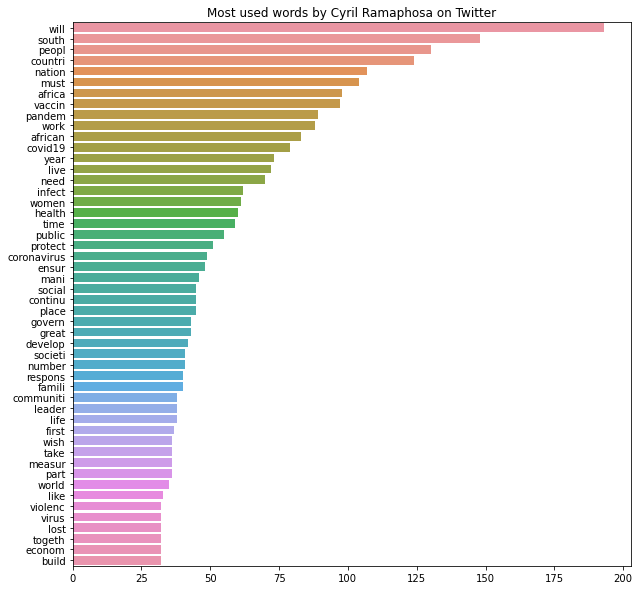

In [301]:

plt.figure(figsize =(10,10))
plt.title('Most used words by Cyril Ramaphosa on Twitter')
sns.barplot(dataf.values,dataf.index)


C:\Users\alek3\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Most used words by John Steenhuisen on Twitter'}>

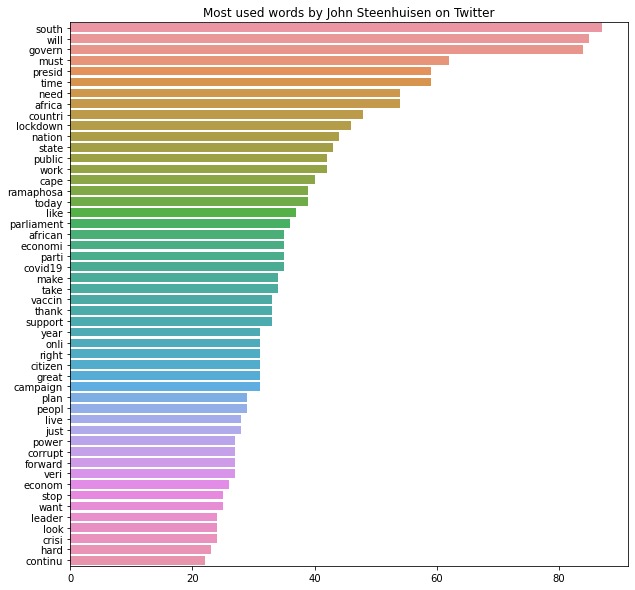

In [302]:
plt.figure(figsize =(10,10))
plt.title('Most used words by John Steenhuisen on Twitter')
sns.barplot(dataf_j.values,dataf_j.index)


From the list of Steenhuisen's most used words we see references to the government and Ramaphosa, from the previous analysis
 we can speculate that it goes hand in hand with the word 'corruption' which he often uses.

In [217]:
#applying polarity to tweets
def get_sentiment(tweet):
    vader = SentimentIntensityAnalyzer() 
    return vader.polarity_scores(tweet)['compound']
df['polarity'] = df['tweets'].apply(get_sentiment)
df_j['polarity_j'] = df_j['tweets_j'].apply(get_sentiment)
          
          



In [305]:
print("John Steenhuisen's tweets mean polarity: ",round(df['polarity'].mean(),3))
print("Cyril Ramaphosa's tweets mean polarity ",round(df_j['polarity_j'].mean(),3))

John Steenhuisen's tweets mean polarity:  0.249
Cyril Ramaphosa's tweets mean polarity  0.112


In [316]:
print('\n\nCyril Ramaphosa tweets with most negative polarity:\n\n')
sorted_by_polarity = df.sort_values(by='polarity', ascending=True)
def print_negativ_tweets(n):
    for i in range (n):
        print(sorted_by_polarity['tweets'].iloc[i])
        print('-'*100)
print_negativ_tweets(6)
print('\n\nJohn Steenhuisen tweets with most negative polarity:\n\n')
sorted_by_polarity_j = df_j.sort_values(by='polarity_j', ascending=True)
def print_negativ_tweets_j(n):
    for i in range (n):
        print(sorted_by_polarity_j['tweets'].iloc[i])
        print('-'*100)
print_negativ_tweets_j(6)



Cyril Ramaphosa tweets with most negative polarity:


So long as this country’s women and children live in fear from violence, we cannot regard ourselves as totally free. So long as women are being harassed, abused, beaten, raped and murdered, we cannot say we are a civilised society.
----------------------------------------------------------------------------------------------------
As men, we must stand us and declare that we are going to bring an end to #GBVF. It is us who violate the women of our country; it is us who abuse, rape and kill women through toxic masculinity. It is us who have the power to end this scourge. #ANCMensDialogue
----------------------------------------------------------------------------------------------------
I once again call on every single South African listening tonight to consider the consequence of their silence.
 
We can only move forward and defeat this evil if we speak up.
 
Gender-based violence has no place in in this country.

https://t.co/De

Surprisingly,  tweets with the lowest polarity of both politicians refer to each other. South Africa's president writes about crimes in his country and about lockdown, oppositionist accuses him of 'fear-mongering' and 'economy-bashing'.

C:\Users\alek3\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':"Cyril Ramaphosa's polarity on Twitter"}, xlabel='date', ylabel='polarity'>

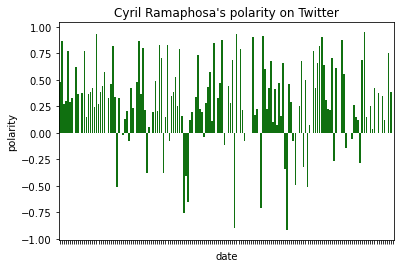

In [308]:

g1=sns.barplot(df['date'],df['polarity'],color ='green',ci=None)
g1.set(xticklabels=[])
plt.title("Cyril Ramaphosa's polarity on Twitter")
g1


C:\Users\alek3\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':"John Steenhuisen's polarity on Twitter"}, xlabel='date_j', ylabel='polarity_j'>

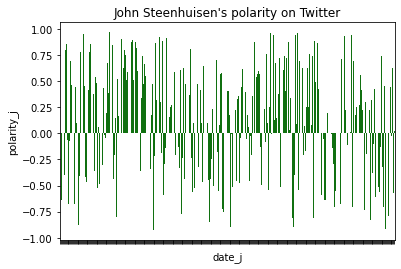

In [309]:
g2 =sns.barplot(df_j['date_j'],df_j['polarity_j'],color ='green',ci=None)
g2.set(xticklabels=[]) 
plt.title("John Steenhuisen's polarity on Twitter")

g2

Presenting this data this way is very illegible, so I averaged the polarity.

In [224]:
part = df[['date', 'polarity']]
part = part.sort_values(by='date', ascending=True)
part['MA Polarity'] = part.polarity.rolling(9, min_periods=3).mean()

part_j = df_j[['date_j', 'polarity_j']]
part_j = part_j.sort_values(by='date_j', ascending=True)
part_j['MA Polarity_j'] = part_j.polarity_j.rolling(12, min_periods=3).mean()

C:\Users\alek3\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':"Cyril Ramaphosa's polarity on Twitter"}, xlabel='date', ylabel='MA Polarity'>

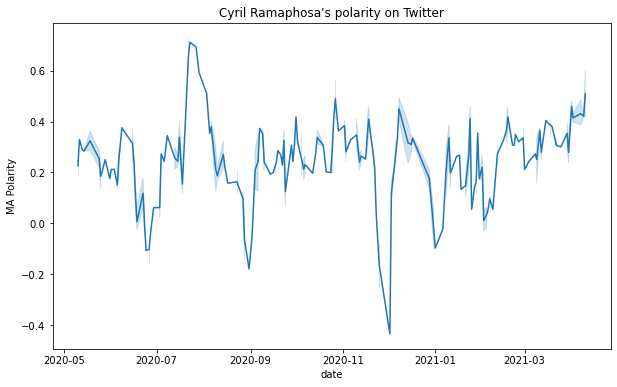

In [311]:
plt.figure(figsize =(10,6))
plt.title("Cyril Ramaphosa's polarity on Twitter")
sns.lineplot(part['date'],part['MA Polarity'])

C:\Users\alek3\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':"John Steenhuisen's polarity on Twitter"}, xlabel='date_j', ylabel='MA Polarity_j'>

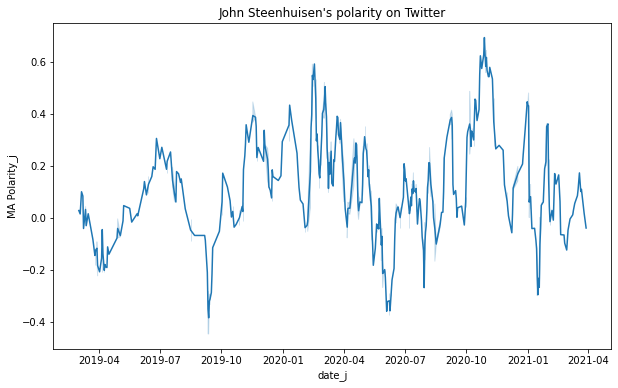

In [312]:
plt.figure(figsize =(10,6))
plt.title("John Steenhuisen's polarity on Twitter")
sns.lineplot(part_j['date_j'],part_j['MA Polarity_j'])

Now, when the data is legible, with information about the important events in South Africa, it might be possible to explain the charts' extremes.

<AxesSubplot:title={'center':"Number of Cyril Ramaphosa's daily tweets"}, xlabel='date', ylabel='count'>

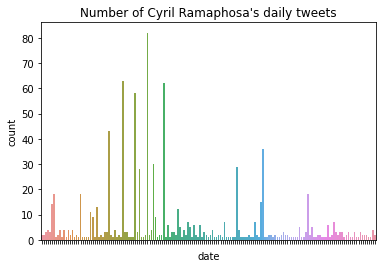

In [314]:
#tweet count

c1 = sns.countplot(x='date', data=df)
c1.set(xticklabels=[]) 
plt.title("Number of Cyril Ramaphosa's daily tweets")
c1

<AxesSubplot:title={'center':"Number of John Steenhuisen's daily tweets"}, xlabel='date_j', ylabel='count'>

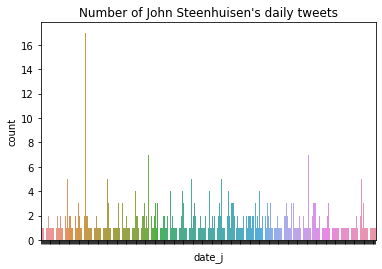

In [313]:
c2 =sns.countplot(x='date_j', data=df_j)
c2.set(xticklabels=[]) 
plt.title("Number of John Steenhuisen's daily tweets")
c2


## Machine Learning
Now I would like to predict if a tweet is made by Cyril Ramaphosa or John Steenhuisen. Since they probably tweet about similar topics, I also downloaded tweets from an American sports journalist - Buster Olney. I want to or see if the accuracy of predicting his tweets will be higher. 

In [229]:
df['author'] = 'Cyril Ramaphosa'
df_j['author'] = 'John Steenhuisen'
df_j.rename(columns={'tweets_j': 'tweets'}, inplace=True)
new = df[['author','tweets']]
new_j = df_j[['author','tweets']]
concatenated = new.append(new_j, ignore_index = True)

In [235]:

mine_tweets('Buster_ESPN',3000)
new_b = pd.DataFrame({'tweets':tweets_b,'author':'Buster Olney'})
new_b = new_b[~new_b.tweets.str.contains("@")]
new_b = new_b[~new_b.tweets.str.contains("RT")]
new_b = new_b.reset_index(drop=True)

In [236]:
concatenated = new.append([new_j, new_b])
concatenated = concatenated.sample(frac=1).reset_index(drop=True)

In [238]:
concatenated['author'].value_counts()

Cyril Ramaphosa     880
John Steenhuisen    614
Buster Olney        545
Name: author, dtype: int64

In [239]:
#{1:Ramaphosa,2:Steenhuisen,3:Olney}
concatenated['number'] = concatenated.author.map({'Cyril Ramaphosa':1, 'John Steenhuisen':2, 'Buster Olney':3})

In [240]:
text = concatenated['tweets']
number = concatenated['number']

In [241]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text, number, test_size=0.3, random_state=1)

In [242]:
#Convert a collection of text documents to a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = CountVectorizer(lowercase=False, token_pattern=r'(?u)\b\w+\b|\,|\.|\?|\;|\:|\!|\'')


In [243]:
X_train_dtm = vectorizer.fit_transform(X_train)
X_test_dtm = vectorizer.transform(X_test)

In [244]:
from string import punctuation
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
#vetorizing the tweets
def add_feature(text, feature_to_add):
    from scipy.sparse import csr_matrix, hstack
    return hstack([text, csr_matrix(feature_to_add).T], 'csr')

X_train_chars = X_train.str.len()
X_train_punc = X_train.apply(lambda x: len([c for c in str(x) if c in punctuation]))
X_test_chars = X_test.str.len()
X_test_punc = X_test.apply(lambda x: len([c for c in str(x) if c in punctuation]))
X_train_dtm = add_feature(X_train_dtm, [X_train_chars, X_train_punc])
X_test_dtm = add_feature(X_test_dtm, [X_test_chars, X_test_punc])

nb = MultinomialNB()

In [245]:
#naive bayes classyfication learning
grid_values = {'alpha':[0.01, 0.1, 1.0, 10.0, 100.0]}
grid_nb = GridSearchCV(nb, param_grid=grid_values, scoring='neg_log_loss')
grid_nb.fit(X_train_dtm, y_train)
grid_nb.best_params_

{'alpha': 0.1}

In [246]:
nb = MultinomialNB(alpha=1.0)

In [247]:
nb.fit(X_train_dtm, y_train)

MultinomialNB()

In [248]:
y_pred_test = nb.predict(X_test_dtm)

In [249]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_test)

0.8725490196078431

In [315]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       0.82      0.95      0.88       259
           2       0.87      0.75      0.81       199
           3       1.00      0.89      0.94       154

    accuracy                           0.87       612
   macro avg       0.90      0.87      0.88       612
weighted avg       0.88      0.87      0.87       612



As I expected the highest precision is precision about journalist becouse his tweets are unralated to politics 

## Ideas for higher score
-Better preprocess <br>
-Deleting all the short tweets from a train and test data <br>
-Number of likes and date could be add to the ML model <br>